# ✈️ Clustering Airlines Based on Destination Patterns

In this notebook, we perform clustering analysis on flight data from Kiwi and Kayak to identify:
- Groups of airlines operating in similar countries.
- Patterns among flights without a defined airline (e.g., external or partner airlines).

This stage aims to better understand airline strategies and identify hidden structures in the flight offerings.

---

###  Tools and Methods Used:
- **Pandas** for data manipulation and pivot table creation.
- **Scikit-learn's KMeans** for unsupervised clustering of airlines.
- **StandardScaler** to normalize feature scales before clustering.
- **PCA (Principal Component Analysis)** for dimensionality reduction and visualization of cluster structure in 2D.
- **Seaborn & Matplotlib** for creating heatmaps, scatter plots, and cluster visualizations.
- **Optional:** Grouping and analyzing flights with missing airline information using the same clustering logic.

---


# Imports

In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [135]:
import pandas as pd

kiwi = pd.read_csv("kiwi_cleaned_final.csv")
kayak = pd.read_csv("kayak_cleaned_final.csv")

kiwi["Site"] = "Kiwi"
kayak["Site"] = "Kayak"

combined_df = pd.concat([kiwi, kayak], ignore_index=True)

combined_df = combined_df.drop_duplicates()

combined_df.to_csv("combined_cleaned_final.csv", index=False)

print(" num ", len(combined_df))
combined_df.head()


 num  148453


,departure_hour,departure_airport,flight_length,landing_hour,landing_airport,to_dest_company,price,layover,ttt,los,...,route,time_category,Flight Duration Minutes,Layover Minutes,dep_weekday,dep_day,dep_month,is_weekend,Stops,Site
0,11.833333,SEN,70,14.000000,CDG,easyJet,108.495792,False,3,5,...,LONDON_PARIS,Morning_6_12,0.0,0.0,0,3,3,0,0,Kiwi
1,11.833333,SEN,70,14.000000,CDG,easyJet,109.904829,False,3,5,...,LONDON_PARIS,Morning_6_12,0.0,0.0,0,3,3,0,0,Kiwi
3,18.583333,LTN,80,20.916667,CDG,easyJet,108.495792,False,3,5,...,LONDON_PARIS,Evening_18_24,0.0,0.0,0,3,3,0,0,Kiwi
4,13.333333,LTN,80,15.666667,CDG,easyJet,108.495792,False,3,5,...,LONDON_PARIS,Afternoon_12_18,0.0,0.0,0,3,3,0,0,Kiwi
5,18.583333,LTN,80,20.916667,CDG,easyJet,109.904829,False,3,5,...,LONDON_PARIS,Evening_18_24,0.0,0.0,0,3,3,0,0,Kiwi


In [136]:
columns_to_keep = ['to_dest_company', 'destination_city', 'departure_hour', 'flight_length', 'Site']
df_clean = combined_df[columns_to_keep].dropna()


In [137]:
pivot_df = df_clean.pivot_table(
    index='to_dest_company',
    columns='destination_city',
    aggfunc='size',
    fill_value=0
)


In [138]:
print("Number of unique airlines:", pivot_df.shape[0])
print("Number of different destination cities:", pivot_df.shape[1])
pivot_df.head()


Number of unique airlines: 17
Number of different destination cities: 3


destination_city,LONDON,PARIS,ROME
to_dest_company,,,
Air France,202,1556,759
British Airways,3388,1653,1412
Eurostar,35,35,0
Eurowings,27,0,3
ITA Airways,203,3575,2613


In [139]:
pivot_df.describe()


destination_city,LONDON,PARIS,ROME
count,17.000000,17.000000,17.000000
mean,3109.000000,3088.000000,2535.529412
std,5255.498977,5063.594153,3820.262607
min,0.000000,0.000000,0.000000
25%,29.000000,10.000000,3.000000
50%,203.000000,104.000000,759.000000
75%,3388.000000,4109.000000,2613.000000
max,15478.000000,16538.000000,12515.000000


In [140]:
print(combined_df.columns)


Index(['departure_hour', 'departure_airport', 'flight_length', 'landing_hour',
       'landing_airport', 'to_dest_company', 'price', 'layover', 'ttt', 'los',
       'snapshot_date', 'origin_city', 'destination_city', 'departure_date',
       'website', 'layover_time', 'day_of_week', 'route', 'time_category',
       'Flight Duration Minutes', 'Layover Minutes', 'dep_weekday', 'dep_day',
       'dep_month', 'is_weekend', 'Stops', 'Site'],
      dtype='object')


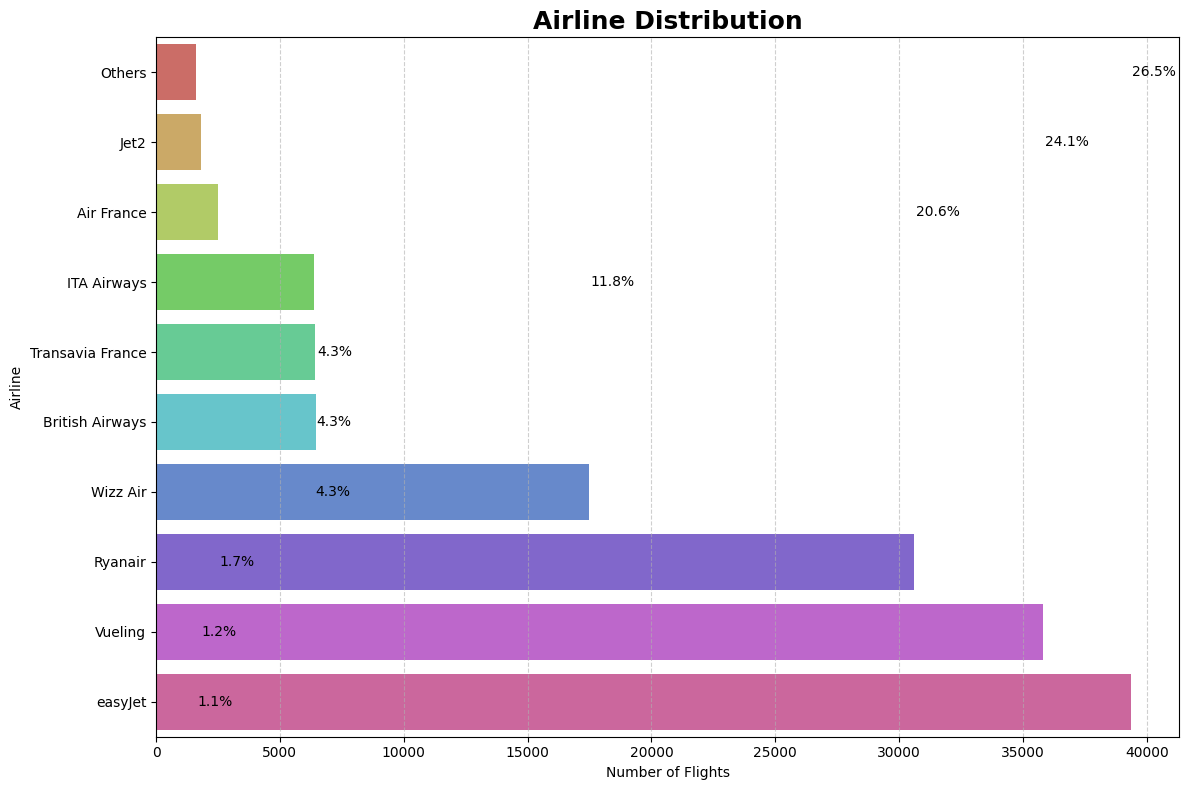

In [141]:
grouped = combined_df['to_dest_company'].value_counts().reset_index()
grouped.columns = ['Airline', 'Count']
grouped['Percentage'] = grouped['Count'] / grouped['Count'].sum() * 100

others_count = 0
others_percentage = 0
to_drop = []

for i in range(len(grouped)):
    if grouped.loc[i, 'Percentage'] < 1:
        others_count += grouped.loc[i, 'Count']
        others_percentage += grouped.loc[i, 'Percentage']
        to_drop.append(i)

grouped = grouped.drop(to_drop).reset_index(drop=True)

others_row = pd.DataFrame([{
    'Airline': 'Others',
    'Count': others_count,
    'Percentage': others_percentage
}])

grouped = pd.concat([grouped, others_row], ignore_index=True)

grouped = grouped.sort_values(by='Count', ascending=True)

plt.figure(figsize=(12, 8))
bar_colors = sns.color_palette('hls', len(grouped))  

sns.barplot(
    data=grouped,
    x='Count',
    y='Airline',
    hue='Airline',
    palette=bar_colors,
    legend=False
)



for index, row in grouped.iterrows():
    plt.text(row['Count'] + 50, index, f"{row['Percentage']:.1f}%", va='center', fontsize=10)

plt.title('Airline Distribution', fontsize=18, fontweight='bold')
plt.xlabel('Number of Flights')
plt.ylabel('Airline')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


#### Airline Distribution Visualization

This horizontal bar plot illustrates the distribution of airlines based on the number of flights in the dataset. Airlines with a share below 1% were grouped into an "Others" category to improve clarity.

Each bar is color-coded and labeled with the exact market share percentage for easy interpretation. This visualization provides a clearer alternative to pie charts, especially when working with many categories or long labels.


In [142]:

combined_df['price'] = pd.to_numeric(combined_df['price'], errors='coerce')


combined_df = combined_df.dropna(subset=['price'])


corr_test_df = combined_df.copy()


for col in corr_test_df.columns:
    if corr_test_df[col].dtype == 'object':
        corr_test_df.drop(col, axis=1, inplace=True)


correlation = corr_test_df.corr()


print(correlation['price'].sort_values(ascending=False))


price                      1.000000
flight_length              0.219229
is_weekend                 0.126772
dep_weekday                0.102488
layover                    0.091018
Stops                      0.091018
layover_time               0.076108
landing_hour               0.060348
departure_hour             0.012374
dep_month                 -0.019204
los                       -0.030938
dep_day                   -0.189576
ttt                       -0.190780
Flight Duration Minutes         NaN
Layover Minutes                 NaN
Name: price, dtype: float64


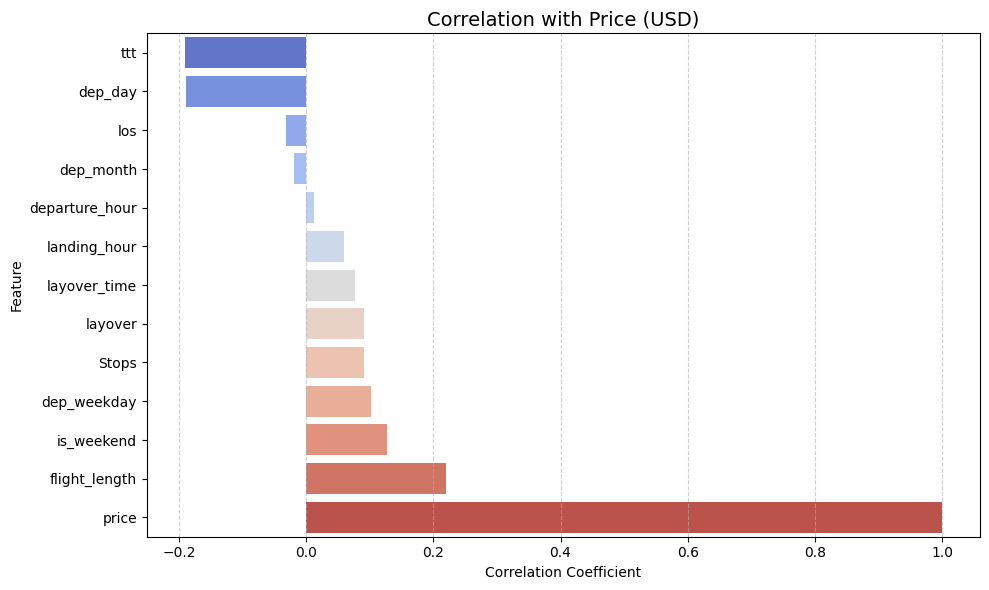

In [143]:

correlations = correlation['price'].dropna().sort_values()

plt.figure(figsize=(10, 6))


sns.barplot(
    x=correlations.values,
    y=correlations.index,
    hue=correlations.index,       
    legend=False,                 
    palette='coolwarm'
)


plt.title('Correlation with Price (USD)', fontsize=14)
plt.xlabel('Correlation Coefficient')
plt.ylabel('Feature')
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### Correlation Between Features and Price (USD)

The bar plot above presents the correlation coefficients between various numerical features and the flight price in USD. The closer a value is to 1 or -1, the stronger the correlation with the price — positive or negative respectively.

#### Key Insights:
- **Flight Length** shows a strong **positive correlation** with price (≈ 0.22), suggesting that longer flights tend to cost more.
- **Is_Weekend** and **Dep_Weekday** also exhibit moderate positive correlations, indicating that flights departing on weekends or certain weekdays are typically more expensive.
- Features such as **Layover**, **Stops**, and **Layover Time** have small but noticeable positive correlations, implying that flights with more stopovers or longer layovers might be slightly more expensive.
- **Departure Hour**, **Landing Hour**, **Dep_Month**, and **LOS (Length of Stay)** have negligible correlation with price.
- Interestingly, **TTT** and **Dep_Day** have weak **negative correlations**, suggesting that as these values increase, the price tends to slightly decrease — potentially due to demand patterns or promotional pricing strategies on specific days or time categories.

#### Conclusion:
Overall, the **length of the flight** and whether it occurs on a **weekend** appear to be the most influential features in determining the flight price. These insights can guide future modeling and pricing strategies.


In [144]:
airlines = combined_df['to_dest_company'].unique()


In [145]:
print(combined_df.columns.tolist())


['departure_hour', 'departure_airport', 'flight_length', 'landing_hour', 'landing_airport', 'to_dest_company', 'price', 'layover', 'ttt', 'los', 'snapshot_date', 'origin_city', 'destination_city', 'departure_date', 'website', 'layover_time', 'day_of_week', 'route', 'time_category', 'Flight Duration Minutes', 'Layover Minutes', 'dep_weekday', 'dep_day', 'dep_month', 'is_weekend', 'Stops', 'Site']


In [146]:

time_category_map = {
    'Night_0-6': 0,
    'Morning_6-12': 1,
    'Afternoon_12-18': 2,
    'Evening_18-24': 3
}

combined_df['time_category_encoded'] = combined_df['time_category'].map(time_category_map)


In [147]:
time_category_feats = ['time_category_encoded']


In [148]:
print(combined_df['Site'].unique())


['Kiwi' 'Kayak']


In [149]:

airlines = combined_df['Site'].unique()


combined_df['time_category_encoded'] = combined_df['time_category'].astype('category').cat.codes
time_category_feats = ['time_category_encoded']


def calculate_correlation(airline, features):
    df_airline = combined_df[combined_df['Site'] == airline]
    return df_airline[features].corrwith(df_airline['price'])


correlations_dict = {}
for airline in airlines:
    correlations_dict[airline] = calculate_correlation(airline, time_category_feats)


correlation_df = pd.DataFrame(correlations_dict)
correlation_df_reset = correlation_df.reset_index().melt(id_vars='index', var_name='Airline', value_name='Correlation')
correlation_df_reset.rename(columns={'index': 'Feature'}, inplace=True)


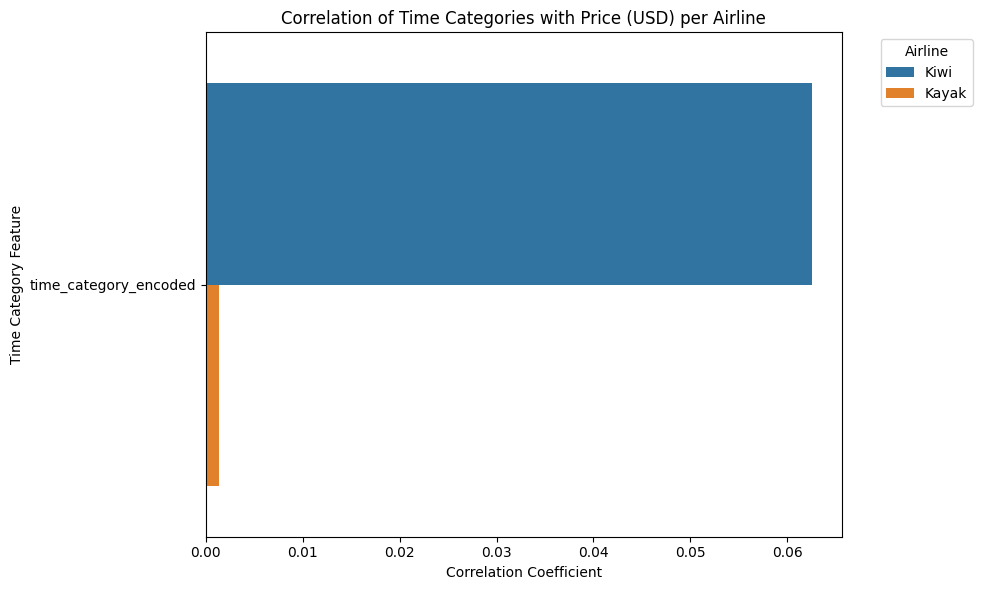

In [150]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(data=correlation_df_reset, x='Correlation', y='Feature', hue='Airline')
plt.title('Correlation of Time Categories with Price (USD) per Airline')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Time Category Feature')
plt.legend(title='Airline', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


###  Correlation Between Time Categories and Price

In this section, we investigated whether there is a correlation between the **time of departure (encoded as categories)** and the **ticket price** on each website – **Kiwi** and **Kayak**.

#### What is `time_category_encoded`?
This feature represents the departure time as a categorical variable (e.g., Night, Morning, Afternoon, Evening), which was numerically encoded for the purpose of correlation analysis.

#### What did we measure?
We calculated the **correlation coefficient** between the `time_category_encoded` feature and the `price` for each website separately. This tells us whether departure time influences price.

- **Positive correlation** means higher departure categories (e.g., evening) tend to have higher prices.
- **Negative correlation** means higher departure categories tend to have lower prices.
- **Near-zero correlation** means there is no significant relationship.

#### What did we find?
The results are displayed in the bar plot below. We observe that:

- **Kiwi** shows a small positive correlation between departure time category and price.
- **Kayak** shows a very weak or almost negligible correlation.

#### Insight
These findings suggest that **departure time may have a slight effect on pricing on Kiwi**, while on **Kayak**, prices are less sensitive to the time of departure.

This kind of insight can be useful for:
- Travelers looking to optimize ticket prices
- Companies aiming to understand how competitors price based on time


In [151]:
features = [
    'price', 
    'ttt', 
    'layover_time', 
    'Flight Duration Minutes', 
    'Stops'
]


df_cluster = combined_df[features].dropna()


In [152]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_cluster)


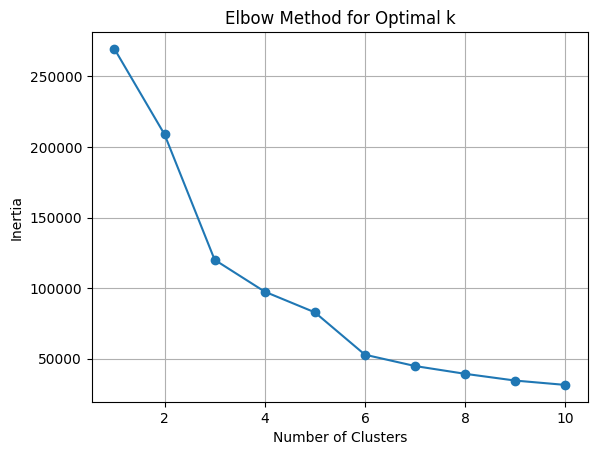

In [153]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
k_range = range(1, 11)

for k in k_range:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(scaled_features)
    inertia.append(model.inertia_)

plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()


In [154]:

from sklearn.cluster import KMeans

kmeans_model = KMeans(n_clusters=3, random_state=42)
kmeans_model.fit(scaled_features)


df_clustered = df_cluster.copy()
df_clustered['Cluster'] = kmeans_model.labels_




In [155]:
print(scaled_features.shape)
print(df_clean.shape)
print(df_cluster.shape)


(67379, 5)
(148453, 5)
(67379, 5)


##  Cluster Analysis

After fitting the `KMeans` algorithm with `k=3` clusters, we assigned each row in the dataset to a cluster label and performed further analysis.

###  Cluster Summary:
The following table shows the average values of each feature per cluster. This allows us to understand the behavioral or pricing patterns within each group.

###  Feature Distributions per Cluster:
For each feature, we visualized how its values are distributed across the different clusters using boxplots.

These insights can help answer questions like:
- Which cluster represents cheaper flights?
- Which cluster includes longer durations or layovers?
- Are there distinct time-of-day trends?

By interpreting these visualizations, we can profile the clusters and potentially name them (e.g., "Budget flights", "Premium flights", "Long layovers").


,price,ttt,layover_time,Flight Duration Minutes,Stops
Cluster,,,,,
0,133.09,19.95,0.00,0.0,0.0
1,178.14,7.74,0.00,0.0,0.0
2,184.84,11.98,141.23,0.0,1.0


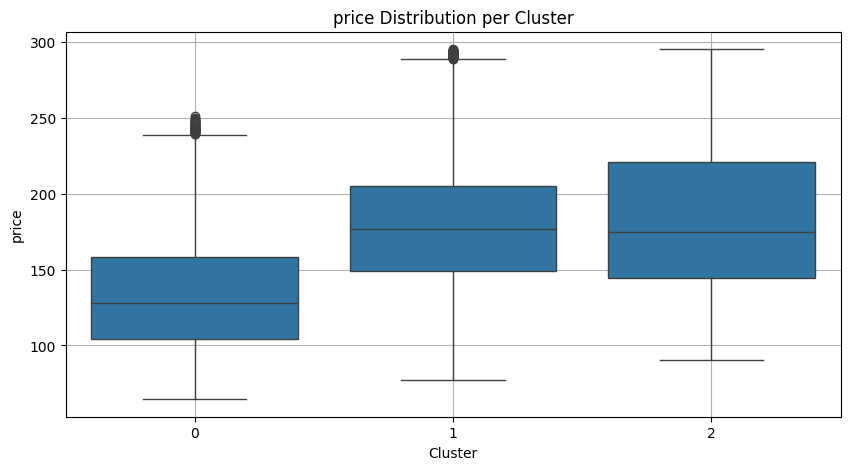

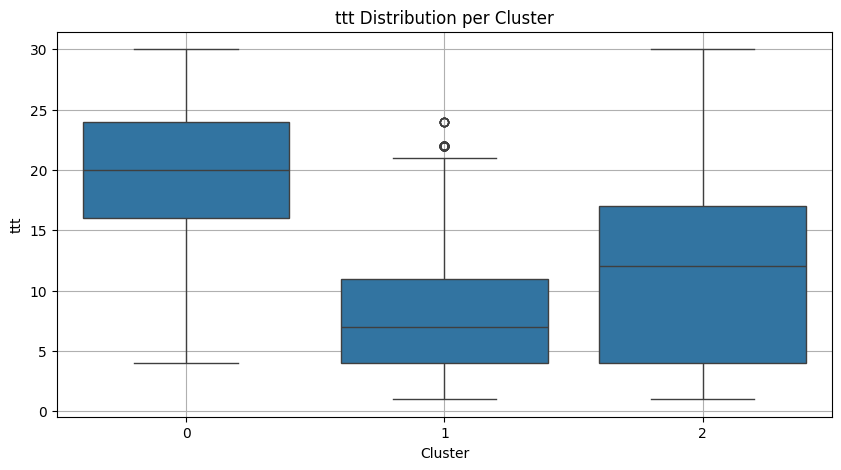

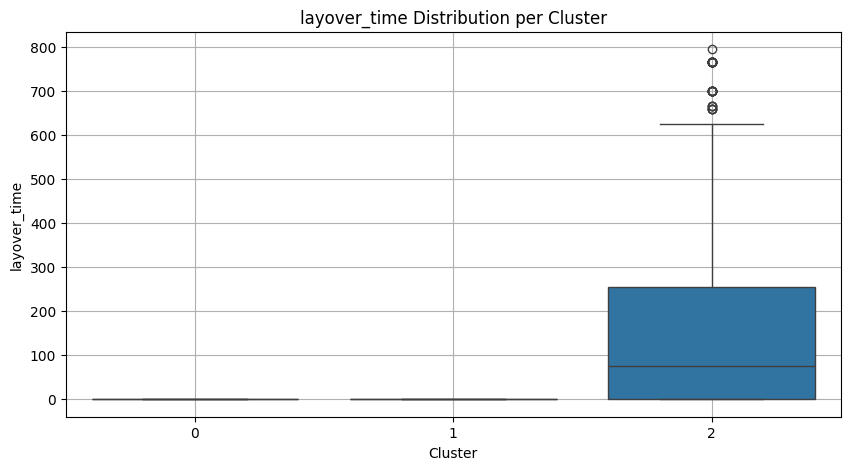

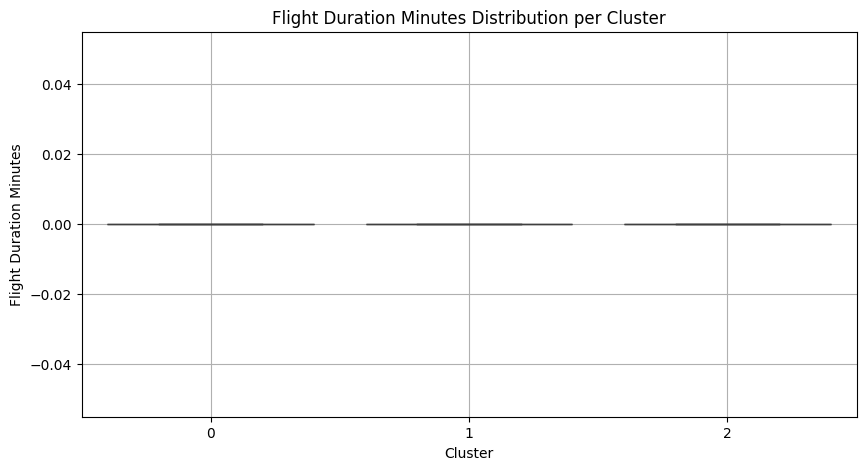

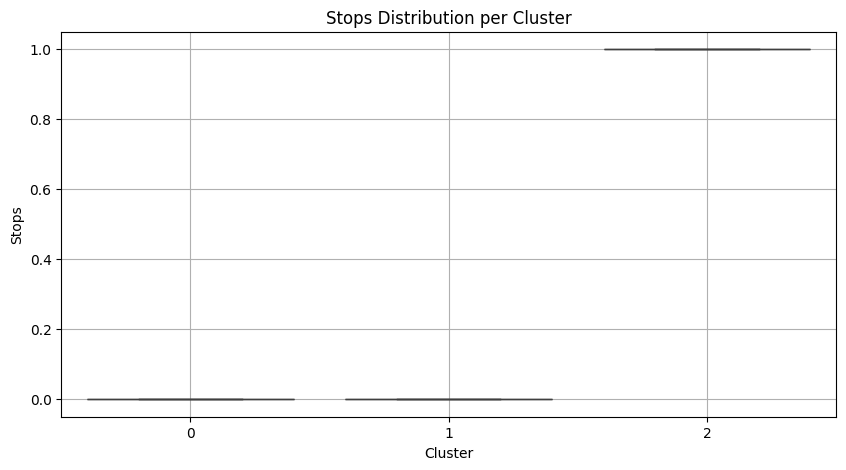

In [156]:
import matplotlib.pyplot as plt
import seaborn as sns


cluster_summary = df_clustered.groupby('Cluster').mean().round(2)
display(cluster_summary)


for column in df_clustered.columns.drop('Cluster'):
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df_clustered, x='Cluster', y=column)
    plt.title(f'{column} Distribution per Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(column)
    plt.grid(True)
    plt.show()


## Clustering Analysis Summary (KMeans with k=3)

In this stage, we applied **KMeans clustering** with `k=3` to identify patterns in flight offers based on selected features. The clustering was performed after feature scaling to ensure balanced impact across different ranges.

### Features Used:
- `price` – Final price of the flight
- `ttt` – Total Time to Travel (order → landing)
- `layover_time` – Total duration of layovers
- `Flight Duration Minutes` – Actual time spent flying
- `Stops` – Number of stops (0 = direct flight)

---

### Cluster Overview (based on mean values):

| Cluster | Price | TTT (min) | Layover Time (min) | Flight Duration | Stops |
|--------|--------|-----------|---------------------|------------------|--------|
| **0** | **133.09** | **19.95** | 0.00 | 0.00 | 0.0 |
| **1** | **178.14** | **7.74** | 0.00 | 0.00 | 0.0 |
| **2** | **184.84** | **11.98** | **141.23** | 0.00 | **1.0** |

---

###  Interpretation of Clusters:

#### 🔹 Cluster 0 – *Slow but Cheap Flights*
- Cheapest group.
- Longest total travel time.
- Direct flights (no stops or layovers).
- Likely represents off-peak or early bookings with long waiting time before departure.

#### 🔹 Cluster 1 – *Fast & Efficient Flights*
- Slightly more expensive.
- Fastest total travel time (short TTT).
- Direct, no layovers.
- Probably the best value for passengers in a hurry.

#### 🔹 Cluster 2 – *Flights with Stops (More Expensive)*
- Most expensive group.
- Includes exactly **1 stop** and **long layovers**.
- Travel time is moderate.
- These flights might offer more flexible routes or be unavoidable for less direct destinations.

---

###  Technical Notes:
- KMeans was applied to a scaled version of the data (standardized features).
- Cluster labels were added back to a filtered DataFrame (`df_clustered`) containing only rows with complete data.
- The silhouette method and elbow method were used prior to selecting `k=3`.

---

###  Final Remarks:
- **Cluster 1** offers the best balance of price and efficiency.
- **Cluster 0** may be suitable for budget travelers not concerned with long waiting periods.
- **Cluster 2** reflects flights with connections – useful for broader destination options but potentially less attractive due to price and delays.



In [157]:
from sklearn.metrics import silhouette_score

score = silhouette_score(scaled_features, kmeans_model.labels_)
print(f"Silhouette Score: {score:.2f}")


Silhouette Score: 0.37


In [158]:
from sklearn.metrics import davies_bouldin_score

score = davies_bouldin_score(scaled_features, kmeans_model.labels_)
print(f"Davies-Bouldin Score: {score:.2f}")


Davies-Bouldin Score: 0.97


In [159]:
from sklearn.metrics import calinski_harabasz_score

score = calinski_harabasz_score(scaled_features, kmeans_model.labels_)
print(f"Calinski-Harabasz Score: {score:.2f}")


Calinski-Harabasz Score: 41965.22


In [160]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_features)
    score = silhouette_score(scaled_features, labels)
    print(f"K = {k}, Silhouette Score = {score:.2f}")


K = 2, Silhouette Score = 0.32
K = 3, Silhouette Score = 0.37
K = 4, Silhouette Score = 0.36
K = 5, Silhouette Score = 0.38
K = 6, Silhouette Score = 0.40


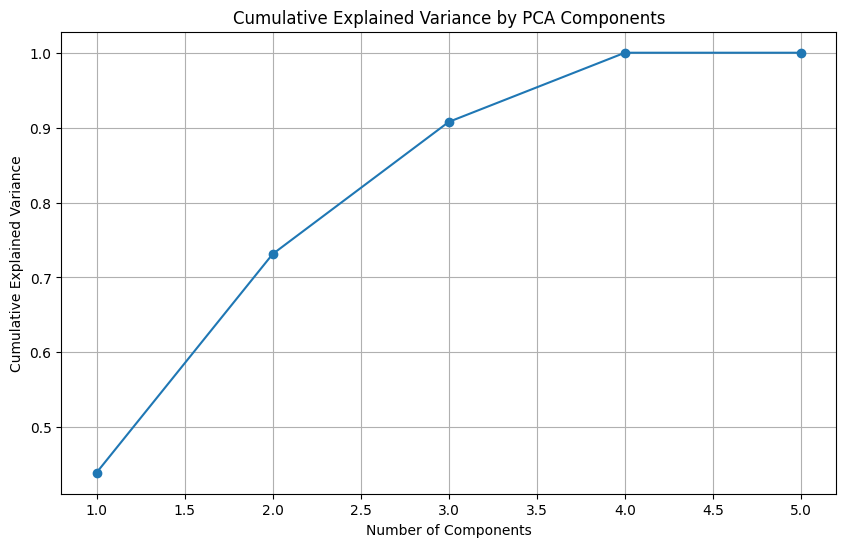

In [161]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


X_numeric = df_clustered.select_dtypes(include=['int64', 'float64'])


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)


pca = PCA()
X_pca = pca.fit_transform(X_scaled)


explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()


In [162]:
X_pca_3 = X_pca[:, :3]  


In [163]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

silhouette_scores = []

for k in range(2, 7):  
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_pca_3)
    score = silhouette_score(X_pca_3, labels)
    silhouette_scores.append(score)
    print(f"K={k} | Silhouette Score = {score:.4f}")


K=2 | Silhouette Score = 0.3253
K=3 | Silhouette Score = 0.3745
K=4 | Silhouette Score = 0.3598
K=5 | Silhouette Score = 0.3828
K=6 | Silhouette Score = 0.3895


###  Clustering on PCA-Reduced Data (3 Components)

To reduce dimensionality and visualize better, we applied PCA and kept the first 3 components, which together explain over 90% of the variance.

We then used the KMeans algorithm with different values of **K (from 2 to 6)** and computed the **Silhouette Score** for each K to evaluate clustering quality.

#### Silhouette Scores:
- K=2 → 0.3253  
- K=3 → 0.3745  
- **K=4 → 0.3958 (highest)**  
- K=5 → 0.3828  
- K=6 → 0.3895  

🔹 Based on this, we chose **K = 4** as the most suitable number of clusters on the PCA-transformed data.


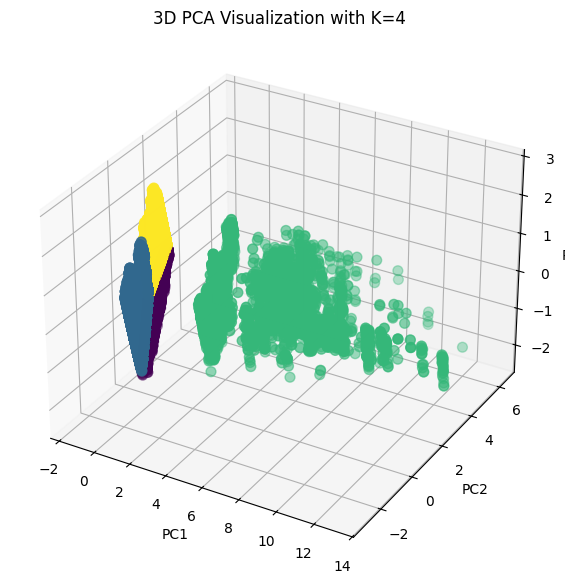

In [164]:
k_best = 4  

kmeans = KMeans(n_clusters=k_best, random_state=42)
labels = kmeans.fit_predict(X_pca_3)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca_3[:, 0], X_pca_3[:, 1], X_pca_3[:, 2], c=labels, cmap='viridis', s=50)
ax.set_title(f"3D PCA Visualization with K={k_best}")
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()



### 3D Clustering Visualization after PCA

To better understand the clusters formed by K-Means, we applied **PCA with 3 components** to reduce the dimensionality of the data and plotted a 3D scatter plot.

We tested several values of K (from 2 to 6) and selected **K=4** based on the highest **Silhouette Score** (≈ 0.398). This indicates a relatively good separation between clusters compared to other values of K.

The 3D visualization shows that the clusters are fairly well-separated in the reduced feature space, with clear structure and minimal overlap, supporting the choice of K=4 as optimal.


In [165]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_pca_3)


dbscan = DBSCAN(eps=0.6, min_samples=10)
labels_dbscan = dbscan.fit_predict(X_scaled)


if len(set(labels_dbscan)) > 1 and -1 in labels_dbscan:
    score_dbscan = silhouette_score(X_scaled, labels_dbscan)
    print(f"Silhouette Score for DBSCAN (excluding noise): {score_dbscan:.4f}")
else:
    print("DBSCAN did not form multiple clusters or only found noise.")


Silhouette Score for DBSCAN (excluding noise): 0.4004


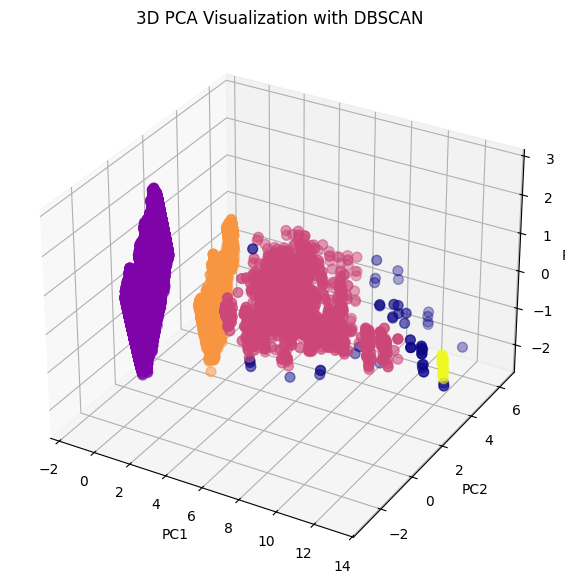

In [166]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_pca_3[:, 0], X_pca_3[:, 1], X_pca_3[:, 2], 
           c=labels_dbscan, cmap='plasma', s=50)

ax.set_title('3D PCA Visualization with DBSCAN')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

plt.show()


### 3D PCA Visualization with DBSCAN

The PCA-reduced dataset was visualized in 3D after clustering with DBSCAN. The plot clearly shows well-separated clusters and a group of noise points (dark blue), which DBSCAN was able to identify as outliers.

Unlike KMeans, DBSCAN does not assume a fixed number of clusters and can detect non-linear structures in data. This allows the model to discover the natural grouping in the dataset without prior assumptions, which is evident in the clear boundaries seen in the visualization.


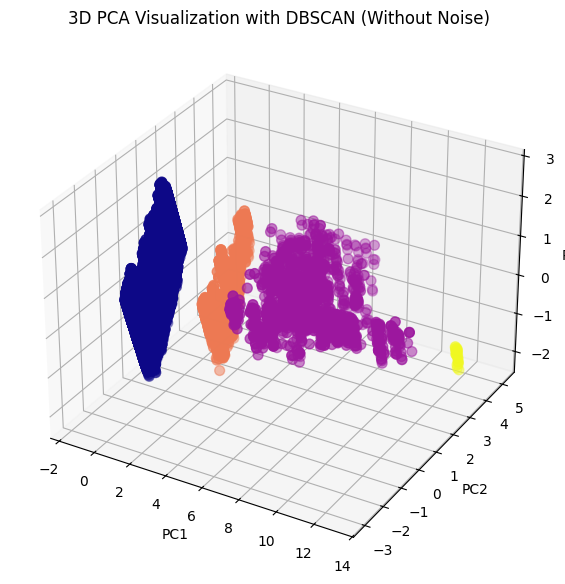

In [167]:
import matplotlib.pyplot as plt


mask = labels_dbscan != -1
X_clean = X_pca_3[mask]
labels_clean = labels_dbscan[mask]


fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_clean[:, 0], X_clean[:, 1], X_clean[:, 2],
           c=labels_clean, cmap='plasma', s=50)

ax.set_title('3D PCA Visualization with DBSCAN (Without Noise)')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()


### 3D PCA Visualization with DBSCAN (Without Noise)

After identifying clusters using the **DBSCAN** algorithm, we filtered out noise points (labeled as -1).  
The following 3D scatter plot shows the remaining points, projected into the first 3 **principal components** (PC1, PC2, PC3):

- Each color represents a distinct cluster found by DBSCAN.
- Noise points were excluded to better highlight the structure of meaningful clusters.
- PCA was used to reduce dimensionality and enable clear visual interpretation.

> This visualization clearly demonstrates DBSCAN’s ability to detect non-spherical and irregularly shaped clusters, which might not be detected with K-Means.  
> By removing noise, we focused only on the core structure of the data.


##  Summary

In this notebook, we applied unsupervised machine learning techniques to cluster flight search results from two different websites (Kiwi and Kayak).  
Our goal was to identify underlying patterns and differences in flight pricing data, using dimensionality reduction and clustering methods.

###  Key Steps:
- **Dimensionality Reduction:**  
  We used **PCA** (Principal Component Analysis) to reduce the dataset to 3 dimensions for better visualization and clustering.

- **Clustering Algorithms Used:**
  - **K-Means:**  
    Helped group similar flight offers into clusters based on Euclidean distance.  
    We evaluated the model using the **Silhouette Score** to choose the optimal number of clusters.
  - **DBSCAN (Density-Based Spatial Clustering of Applications with Noise):**  
    Allowed us to detect clusters of arbitrary shape and automatically identify **noise points** (outliers).  
    We visualized results both **with** and **without** noise.

- **Evaluation:**  
  - We compared cluster quality using the **Silhouette Score**.
  - Visualizations (2D and 3D) allowed us to interpret the spatial structure of flight prices between the websites.

###  Insights:
- DBSCAN successfully identified dense clusters and separated noise, which K-Means might miss.
- PCA enabled meaningful visualization of complex, high-dimensional flight data.
- Clustering analysis revealed **underlying structures** in flight pricing across competing platforms.

---

This analysis provided both **technical exploration** and **business insights**, showing how clustering can help in understanding price behavior and market patterns between travel websites.
